In [130]:
import tensorflow as tf
print(tf.__version__)

2.6.0


In [131]:
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
if gpus: 
    tf.config.set_logical_device_configuration(
        gpus[0],
        [tf.config.LogicalDeviceConfiguration(memory_limit=15292)]
    )

logical_gpus = tf.config.list_logical_devices('GPU')
print(logical_gpus)
print(len(gpus), "Physical GPU,", len(logical_gpus), "Logical GPUs")

[LogicalDevice(name='/device:GPU:0', device_type='GPU')]
1 Physical GPU, 1 Logical GPUs


In [132]:
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

print()
print()

import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8461255376981012402
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 16034824192
locality {
  bus_id: 1
  links {
  }
}
incarnation: 11653526416863730792
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2060, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


Num GPUs Available:  1


In [133]:
import pathlib
import os
import matplotlib.pyplot as plt
import numpy as np


In [134]:
# function to plot the training/validation accuracies/losses.

def plot_learning(history):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4))
    axes[0].plot(history.history['loss'])   
    axes[0].plot(history.history['val_loss'])
    #axes[0].grid()
    axes[0].legend(['loss','val_loss'])
    axes[1].plot(history.history['accuracy'])   
    axes[1].plot(history.history['val_accuracy'])
    #axes[1].grid()
    axes[1].legend(['accuracy','val_accuracy'])

In [135]:
train_dir = pathlib.Path("blood_cell_data/TRAIN")
test_dir = pathlib.Path("blood_cell_data/TEST")

In [136]:
class_names = os.listdir(train_dir)
class_names

['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL']

In [91]:
batch_size = 64
img_height = 120
img_width = 160

In [92]:
# resolution of images
plt.imread(str(list(train_dir.glob(class_names[1]+'/*.jpeg'))[0])).shape

(240, 320, 3)

In [93]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    seed=21,
    validation_split= 0.12,
    subset= 'training',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 9957 files belonging to 4 classes.
Using 8763 files for training.


In [94]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    seed=21,
    validation_split= 0.12,
    subset= 'validation',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 9957 files belonging to 4 classes.
Using 1194 files for validation.


In [95]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 71 files belonging to 4 classes.


In [96]:
## Data Augmentation
# import os
# os.path.join(train_dir,'MONOCYTE')
train_ds.class_names

['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL']

In [97]:
# #function for preprocessing the images
# from skimage import io
# from skimage.transform import rescale, resize
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# datagen = ImageDataGenerator(
#     rescale=1.0/255.0,
#     #featurewise_center=True,
#     #featurewise_std_normalization=True,
#     rotation_range=30,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     zoom_range = 0.2,
#     horizontal_flip=True,
#     vertical_flip=True,)

# def preprocess_img(img, output_shape, mode):
#     #img = (img - img.min())/(img.max() - img.min())
#     #img = rescale(img, 0.25, multichannel=True, mode='constant')
#     img = resize(img, output_shape, anti_aliasing=True, mode='constant')
    
#     if mode == 'train':
#         if np.random.randn() > 0:
#             img = datagen.random_transform(img)
#     return img

In [98]:
# import os
# from tqdm import tqdm
# import cv2
# import pandas as pd

# def load_data(mode = 'train'):
    
#     images = []
#     labels = []

#     # iterate through training and test sets
#     count =0
    
#     if mode == 'train':
#         dataset = "blood_cell_data/TRAIN"
#     else:
#         dataset = "blood_cell_data/TEST"

#     # iterate through folders in each dataset
#     for folder in os.listdir(dataset):

#         if folder in ['EOSINOPHIL']: label = 0
#         elif folder in ['LYMPHOCYTE']: label = 1
#         elif folder in ['MONOCYTE']: label = 2
#         elif folder in ['NEUTROPHIL']: label = 3

#         # iterate through each image in folder
#         for file in tqdm(os.listdir(os.path.join(dataset, folder))):

#             # get pathname of each image
#             img_path = os.path.join(os.path.join(dataset, folder), file)

#             # Open 
#             image = cv2.imread(img_path)
#             image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#             # resize the image
#             #image = cv2.resize(image, image_size)
#             image = preprocess_img(image, (img_height,img_width,3), mode = 'test')
            
#             # Append the image and its corresponding label to the output
#             images.append(image)
#             labels.append(label)

#     images = np.array(images, dtype = 'float32')
#     labels = np.array(labels, dtype = 'int32')

#     return images, labels

In [99]:
# train_df = pd.DataFrame(columns=['path','cell_class'])
# img_path = np.array([])
# labels =  np.array([])
# for cell_class in os.listdir(train_dir):
#     print(os.path.join(train_dir, cell_class))
#     print(len(os.listdir(os.path.join(train_dir,cell_class))))
#     img_path = np.concatenate([img_path, [os.path.join(train_dir,cell_class,k) for k in os.listdir(os.path.join(train_dir,cell_class))]])
#     labels = np.concatenate([labels, np.array([cell_class]*len(os.listdir(os.path.join(train_dir,cell_class))))])
# train_df['path'] = img_path
# train_df['cell_class'] = labels

In [100]:
# defining some parameters for the loader

batch_size = 64
img_height = 120
img_width = 160

# working with 120 x 160 resolution images. Keeping the aspect ratio same this time.

In [101]:
## Predeifined

In [102]:
train_directory = 'blood_cell_data/TRAIN'
# train_directory = 'blood_cell_data/augTrain'
test_directory = 'blood_cell_data/TEST'

In [103]:
# Create generators
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    validation_split=0.2
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [104]:
# Flow image data
train_images=train_generator.flow_from_directory(
    directory=train_directory,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images=train_generator.flow_from_directory(
    directory=train_directory,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images=test_generator.flow_from_directory(
    directory=test_directory,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 7968 images belonging to 4 classes.
Found 1989 images belonging to 4 classes.
Found 71 images belonging to 4 classes.


In [105]:
# train_images = tf.keras.preprocessing.image_dataset_from_directory(
#     train_dir,
#     seed=21,
#     validation_split= 0.12,
#     subset= 'training',
#     image_size=(img_height,img_width),
#     batch_size = batch_size
# )

# val_images = tf.keras.preprocessing.image_dataset_from_directory(
#     train_dir,
#     seed=21,
#     validation_split= 0.12,
#     subset= 'validation',
#     image_size=(img_height,img_width),
#     batch_size = batch_size
# )

# test_images = tf.keras.preprocessing.image_dataset_from_directory(
#     test_dir,
#     image_size=(img_height,img_width),
#     batch_size = batch_size
# )

In [121]:
# Load pretrained model
pretrained_model = tf.keras.applications.mobilenet_v2.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

# The convolutional layers have already been optimized to extract features
pretrained_model.trainable = False

In [122]:
pretrained_model.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_4')>

In [123]:
pretrained_model.output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d_3')>

In [124]:
inputs = pretrained_model.input
x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
outputs = tf.keras.layers.Dense(4, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [110]:
# model.summary()

In [111]:
# # import sequential model
# from tensorflow.keras.models import Sequential
# from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Rescaling
# from tensorflow.keras.regularizers import l2
# num_classes = 4

# model = Sequential([Rescaling(1./1., input_shape=(224, 224,3))])

# model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
#                  activation ='relu', input_shape = (120, 160, 32)))
# model.add(MaxPool2D(pool_size=(2,2)))

# model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', activation ='relu'))
# model.add(MaxPool2D(pool_size=(2,2)))

# model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
# model.add(MaxPool2D(pool_size=(2,2)))

# model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
# model.add(MaxPool2D(pool_size=(2,2)))

# model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation ='relu'))
# model.add(MaxPool2D(pool_size=(2,2)))


# model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.25))
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.20))
# model.add(Dense(128, activation='relu'))
# #model.add(Dense(128, kernel_regularizer = l2(0.001), activation='relu'))

# model.add(Dense(num_classes, activation = "softmax"))

# loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
# model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

In [112]:
history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=100#,
    # callbacks=[
    #     tf.keras.callbacks.EarlyStopping(
    #         monitor='val_loss',
    #         patience=   3,
    #         restore_best_weights=True
    #     )
    # ]
)

Epoch 1/100
249/249 [==============================] - 39s 141ms/step - loss: 0.7724 - accuracy: 0.6872 - val_loss: 0.6563 - val_accuracy: 0.7325
Epoch 2/100
249/249 [==============================] - 28s 112ms/step - loss: 0.4549 - accuracy: 0.8261 - val_loss: 0.3990 - val_accuracy: 0.8552
Epoch 3/100
249/249 [==============================] - 29s 117ms/step - loss: 0.3567 - accuracy: 0.8602 - val_loss: 0.3464 - val_accuracy: 0.8688
Epoch 4/100
249/249 [==============================] - 26s 103ms/step - loss: 0.2557 - accuracy: 0.9079 - val_loss: 0.3366 - val_accuracy: 0.8688
Epoch 5/100
249/249 [==============================] - 25s 102ms/step - loss: 0.2142 - accuracy: 0.9227 - val_loss: 0.3634 - val_accuracy: 0.8562
Epoch 6/100
249/249 [==============================] - 26s 104ms/step - loss: 0.1974 - accuracy: 0.9278 - val_loss: 0.2903 - val_accuracy: 0.8834
Epoch 7/100
249/249 [==============================] - 26s 104ms/step - loss: 0.1582 - accuracy: 0.9443 - val_loss: 0.2972 -

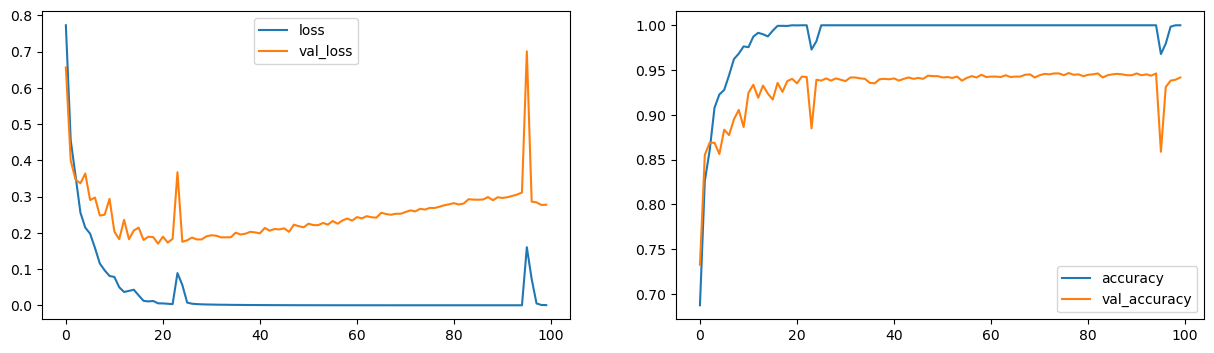

In [113]:
plot_learning(history)

In [125]:
history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=   5,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
249/249 [==============================] - 32s 117ms/step - loss: 0.7964 - accuracy: 0.6787 - val_loss: 0.5605 - val_accuracy: 0.7813
Epoch 2/100
249/249 [==============================] - 27s 107ms/step - loss: 0.4645 - accuracy: 0.8249 - val_loss: 0.4527 - val_accuracy: 0.8110
Epoch 3/100
249/249 [==============================] - 25s 100ms/step - loss: 0.3407 - accuracy: 0.8749 - val_loss: 0.3353 - val_accuracy: 0.8678
Epoch 4/100
249/249 [==============================] - 24s 98ms/step - loss: 0.2582 - accuracy: 0.9061 - val_loss: 0.3003 - val_accuracy: 0.8773
Epoch 5/100
249/249 [==============================] - 24s 97ms/step - loss: 0.2092 - accuracy: 0.9260 - val_loss: 0.2588 - val_accuracy: 0.8984
Epoch 6/100
249/249 [==============================] - 24s 96ms/step - loss: 0.1592 - accuracy: 0.9467 - val_loss: 0.2640 - val_accuracy: 0.8969
Epoch 7/100
249/249 [==============================] - 24s 97ms/step - loss: 0.1357 - accuracy: 0.9543 - val_loss: 0.2129 - val

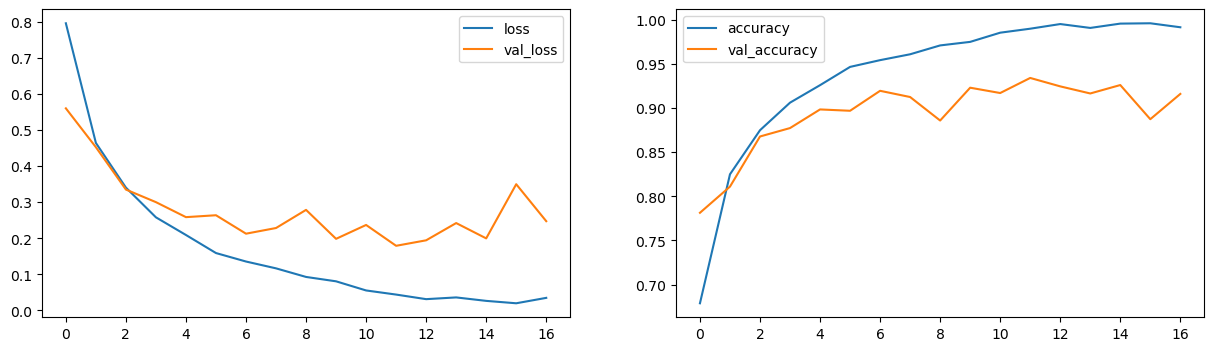

In [126]:
plot_learning(history)

Augmented Image Generation for training and testing

In [127]:

train_directory = 'blood_cell_data/augTrain'
test_directory = 'blood_cell_data/TEST'


# Flow image data
train_images=train_generator.flow_from_directory(
    directory=train_directory,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images=train_generator.flow_from_directory(
    directory=train_directory,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images=test_generator.flow_from_directory(
    directory=test_directory,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)



# Load pretrained model
pretrained_model = tf.keras.applications.mobilenet_v2.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

# The convolutional layers have already been optimized to extract features
pretrained_model.trainable = False


inputs = pretrained_model.input
x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
outputs = tf.keras.layers.Dense(4, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=100#,
    # callbacks=[
    #     tf.keras.callbacks.EarlyStopping(
    #         monitor='val_loss',
    #         patience=   3,
    #         restore_best_weights=True
    #     )
    # ]
)

Found 13273 images belonging to 4 classes.
Found 3316 images belonging to 4 classes.
Found 71 images belonging to 4 classes.
Epoch 1/100
415/415 [==============================] - 63s 145ms/step - loss: 0.6044 - accuracy: 0.7740 - val_loss: 0.3980 - val_accuracy: 0.8598
Epoch 2/100
415/415 [==============================] - 60s 145ms/step - loss: 0.3529 - accuracy: 0.8726 - val_loss: 0.2914 - val_accuracy: 0.8969
Epoch 3/100
415/415 [==============================] - 60s 146ms/step - loss: 0.2670 - accuracy: 0.9039 - val_loss: 0.2698 - val_accuracy: 0.9029
Epoch 4/100
415/415 [==============================] - 59s 142ms/step - loss: 0.2128 - accuracy: 0.9216 - val_loss: 0.3103 - val_accuracy: 0.8866
Epoch 5/100
415/415 [==============================] - 62s 150ms/step - loss: 0.1770 - accuracy: 0.9350 - val_loss: 0.2162 - val_accuracy: 0.9240
Epoch 6/100
415/415 [==============================] - 75s 181ms/step - loss: 0.1465 - accuracy: 0.9475 - val_loss: 0.2177 - val_accuracy: 0.9240

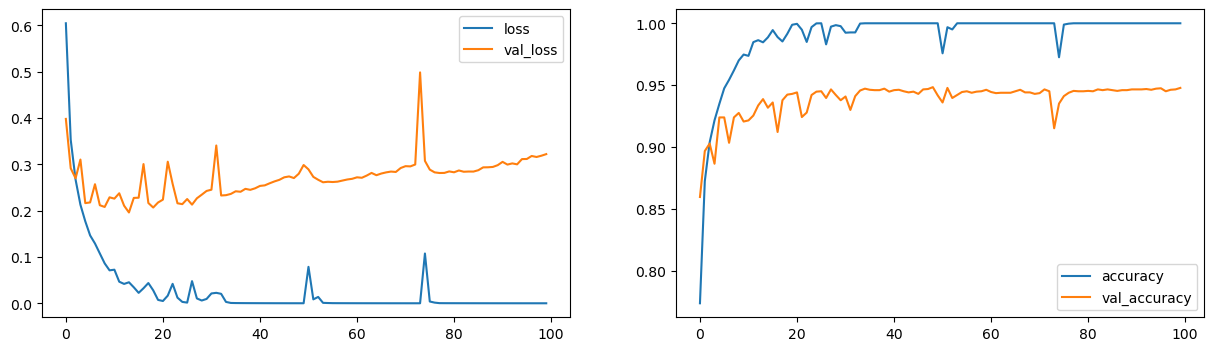

In [128]:
plot_learning(history)

In [138]:

train_directory = 'blood_cell_data/TRAIN'
test_directory = 'blood_cell_data/TEST'


# Flow image data
train_images=train_generator.flow_from_directory(
    directory=train_directory,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images=train_generator.flow_from_directory(
    directory=train_directory,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images=test_generator.flow_from_directory(
    directory=test_directory,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)


# import sequential model
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Rescaling
from tensorflow.keras.regularizers import l2
num_classes = 4

model = Sequential([Rescaling(1./1., input_shape=(224, 224,3))])

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (120, 160, 32)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.20))
model.add(Dense(128, activation='relu'))
#model.add(Dense(128, kernel_regularizer = l2(0.001), activation='relu'))

model.add(Dense(num_classes, activation = "softmax"))

# loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
# model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])



model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=100#,
    # callbacks=[
    #     tf.keras.callbacks.EarlyStopping(
    #         monitor='val_loss',
    #         patience=   3,
    #         restore_best_weights=True
    #     )
    # ]
)

Found 7968 images belonging to 4 classes.
Found 1989 images belonging to 4 classes.
Found 71 images belonging to 4 classes.
Epoch 1/100
249/249 [==============================] - 26s 103ms/step - loss: 1.3874 - accuracy: 0.2441 - val_loss: 1.3865 - val_accuracy: 0.2509
Epoch 2/100
249/249 [==============================] - 23s 93ms/step - loss: 1.3866 - accuracy: 0.2388 - val_loss: 1.3864 - val_accuracy: 0.2509
Epoch 3/100
249/249 [==============================] - 23s 92ms/step - loss: 1.3866 - accuracy: 0.2489 - val_loss: 1.3863 - val_accuracy: 0.2494
Epoch 4/100
249/249 [==============================] - 20s 81ms/step - loss: 1.3865 - accuracy: 0.2489 - val_loss: 1.3863 - val_accuracy: 0.2509
Epoch 5/100
249/249 [==============================] - 21s 85ms/step - loss: 1.3865 - accuracy: 0.2436 - val_loss: 1.3862 - val_accuracy: 0.2509
Epoch 6/100
249/249 [==============================] - 20s 80ms/step - loss: 1.3873 - accuracy: 0.2464 - val_loss: 1.3864 - val_accuracy: 0.2509
Epoch

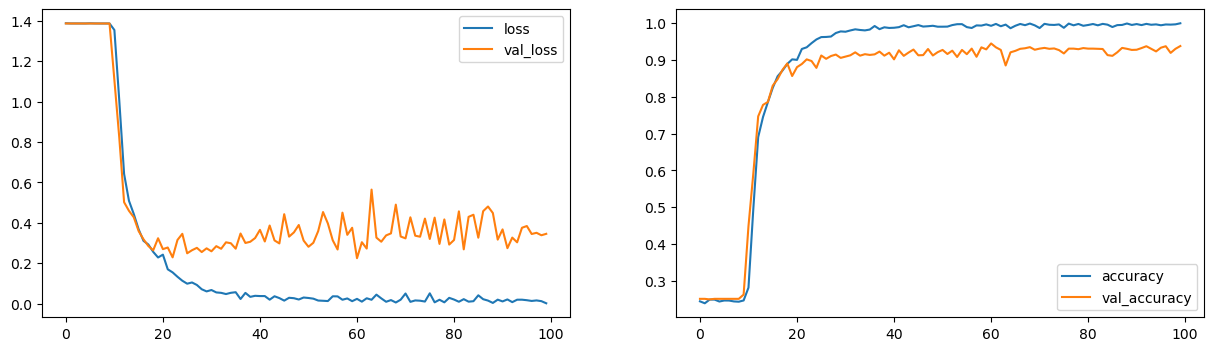

In [139]:
plot_learning(history)

In [140]:

train_directory = 'blood_cell_data/augTrain'
test_directory = 'blood_cell_data/TEST'


# Flow image data
train_images=train_generator.flow_from_directory(
    directory=train_directory,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images=train_generator.flow_from_directory(
    directory=train_directory,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images=test_generator.flow_from_directory(
    directory=test_directory,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)


# import sequential model
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Rescaling
from tensorflow.keras.regularizers import l2
num_classes = 4

model = Sequential([Rescaling(1./1., input_shape=(224, 224,3))])

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (120, 160, 32)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.20))
model.add(Dense(128, activation='relu'))
#model.add(Dense(128, kernel_regularizer = l2(0.001), activation='relu'))

model.add(Dense(num_classes, activation = "softmax"))

# loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
# model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])



model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=100#,
    # callbacks=[
    #     tf.keras.callbacks.EarlyStopping(
    #         monitor='val_loss',
    #         patience=   3,
    #         restore_best_weights=True
    #     )
    # ]
)

Found 13273 images belonging to 4 classes.
Found 3316 images belonging to 4 classes.
Found 71 images belonging to 4 classes.
Epoch 1/100
415/415 [==============================] - 74s 176ms/step - loss: 1.1098 - accuracy: 0.4920 - val_loss: 0.7903 - val_accuracy: 0.6493
Epoch 2/100
415/415 [==============================] - 65s 156ms/step - loss: 0.4689 - accuracy: 0.8100 - val_loss: 0.2552 - val_accuracy: 0.9095
Epoch 3/100
415/415 [==============================] - 77s 185ms/step - loss: 0.2677 - accuracy: 0.8954 - val_loss: 0.1761 - val_accuracy: 0.9394
Epoch 4/100
415/415 [==============================] - 64s 155ms/step - loss: 0.1768 - accuracy: 0.9335 - val_loss: 0.2196 - val_accuracy: 0.9370
Epoch 5/100
415/415 [==============================] - 64s 155ms/step - loss: 0.1320 - accuracy: 0.9531 - val_loss: 0.0916 - val_accuracy: 0.9662
Epoch 6/100
415/415 [==============================] - 64s 154ms/step - loss: 0.0904 - accuracy: 0.9676 - val_loss: 0.0811 - val_accuracy: 0.9695

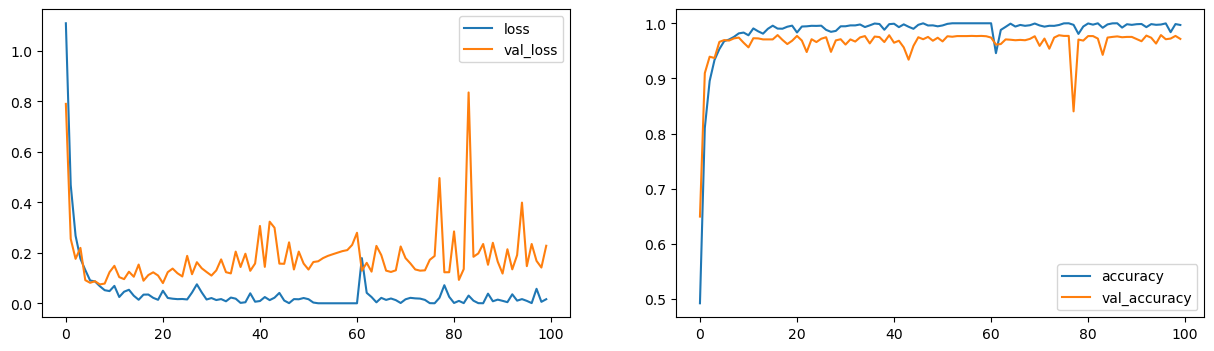

In [141]:
plot_learning(history)

In [41]:
# from keras.preprocessing.image import ImageDataGenerator

# augmented_datagen = ImageDataGenerator(
#     rotation_range=20,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
# #     zoom_range=0.1,
#     channel_shift_range=50,
#     rescale=1. / 255,
#     shear_range=0.4,
#     horizontal_flip=True,
#     vertical_flip=True,
#     fill_mode='constant'
# )

In [46]:
# test_dir

WindowsPath('blood_cell_data/TEST')

In [58]:
# def createFolder(path, folder_name):
#     try:
#         os.mkdir(path)
#     except FileExistsError:
#         pass
#     finally:
#         print("{} folder created".format(folder_name))

In [59]:
# createFolder('blood_cell_data/augTrain/', 'Training')

Training folder created


In [67]:
# num_classess = list(train_images.class_indices.keys())

In [70]:
# createFolder('blood_cell_data/augTrain/', 'Training')

# createFolder('blood_cell_data/augTest/', 'Testing')

# for i in num_classess:
#     createFolder('blood_cell_data/augTrain/' + i, 'Training/' + i)
#     createFolder('blood_cell_data/augTest/' + i, 'Testing/' + i)

Training folder created
Testing folder created
Training/EOSINOPHIL folder created
Testing/EOSINOPHIL folder created
Training/LYMPHOCYTE folder created
Testing/LYMPHOCYTE folder created
Training/MONOCYTE folder created
Testing/MONOCYTE folder created
Training/NEUTROPHIL folder created
Testing/NEUTROPHIL folder created


In [ ]:

# from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# for f in os.listdir(train_dir):
#     pics = os.listdir(os.path.join(train_dir, f))
#     for img in pics:
#         # print(len(os.listdir(os.path.join(train_data_dir, f))))
#         # if len(os.listdir(os.path.join(train_data_dir, f))) >= 2500:
#                 # break
#         loaded_img = load_img(os.path.join(train_dir, f, img))
#         x_test = img_to_array(loaded_img)
#         x_test = x_test.reshape((1,) + x_test.shape)
#         augmented_datagen.fit(x_test)
#         batches = 0
#         for batch in augmented_datagen.flow(x_test, save_to_dir=f'blood_cell_data/augTrain/{f}', save_prefix=f'{f}'):
#             batches += 1
#             if batches > 400 or len(os.listdir(f'blood_cell_data/augTrain/{f}')) >= 2500 :
#                 break

In [71]:

# from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# for f in os.listdir(test_dir):
#     pics = os.listdir(os.path.join(test_dir, f))
#     for img in pics:
#         # print(len(os.listdir(os.path.join(train_data_dir, f))))
#         # if len(os.listdir(os.path.join(train_data_dir, f))) >= 2500:
#                 # break
#         loaded_img = load_img(os.path.join(test_dir, f, img))
#         x_test = img_to_array(loaded_img)
#         x_test = x_test.reshape((1,) + x_test.shape)
#         augmented_datagen.fit(x_test)
#         batches = 0
#         for batch in augmented_datagen.flow(x_test, save_to_dir=f'blood_cell_data/augTest/{f}', save_prefix=f'{f}'):
#             batches += 1
#             if batches > 400 or len(os.listdir(f'blood_cell_data/augTest/{f}')) >= 2500 :
#                 break

In [73]:
# # glob.glob(os.path.join("blood_cell_data\TRAIN", '*', '*'))   

# import glob

# # get all images in the folder
# images = glob.glob(os.path.join("blood_cell_data\\augTest", '*', '*'))

# # abcd = {os.path.basename(x): x for x in images}
# abcd = []
# for x in images:
#     # print(x)
#     abcd.append(os.path.basename(x))

# # apply loop compreheension
# abcd = {os.path.basename(x) for x in images}

# print(len(images))
# print(len(abcd))

# # list(train_data_dir.glob('*/*'))

8657
8657


In [75]:
# # train_directory = 'blood_cell_data/TRAIN'
# train_directory = 'blood_cell_data/augTrain'
# test_directory = 'blood_cell_data/augTest'

In [77]:
# # Flow image data
# train_images=train_generator.flow_from_directory(
#     directory=train_directory,
#     target_size=(224, 224),
#     color_mode='rgb',
#     class_mode='categorical',
#     batch_size=32,
#     shuffle=True,
#     seed=42,
#     # subset='training'
# )

# # val_images=train_generator.flow_from_directory(
# #     directory=test_directory,
# #     target_size=(224, 224),
# #     color_mode='rgb',
# #     class_mode='categorical',
# #     batch_size=32,
# #     shuffle=True,
# #     seed=42,
# #     subset='validation'
# # )

# test_images=test_generator.flow_from_directory(
#     directory=test_directory,
#     target_size=(224, 224),
#     color_mode='rgb',
#     class_mode='categorical',
#     batch_size=32,
#     shuffle=False
# )

Found 16589 images belonging to 4 classes.
Found 8657 images belonging to 4 classes.


In [78]:
# history = model.fit(
#     train_images,
#     validation_data=test_images,
#     epochs=100,
#     callbacks=[
#         tf.keras.callbacks.EarlyStopping(
#             monitor='val_loss',
#             patience=   3,
#             restore_best_weights=True
#         )
#     ]
# )

Epoch 1/100
519/519 [==============================] - 91s 175ms/step - loss: 0.1090 - accuracy: 0.9623 - val_loss: 2.0306 - val_accuracy: 0.5392
Epoch 2/100
519/519 [==============================] - 89s 172ms/step - loss: 0.0691 - accuracy: 0.9758 - val_loss: 2.1247 - val_accuracy: 0.5592
Epoch 3/100
519/519 [==============================] - 87s 167ms/step - loss: 0.0511 - accuracy: 0.9820 - val_loss: 2.0360 - val_accuracy: 0.5421
Epoch 4/100
519/519 [==============================] - 87s 168ms/step - loss: 0.0500 - accuracy: 0.9816 - val_loss: 2.3476 - val_accuracy: 0.5285


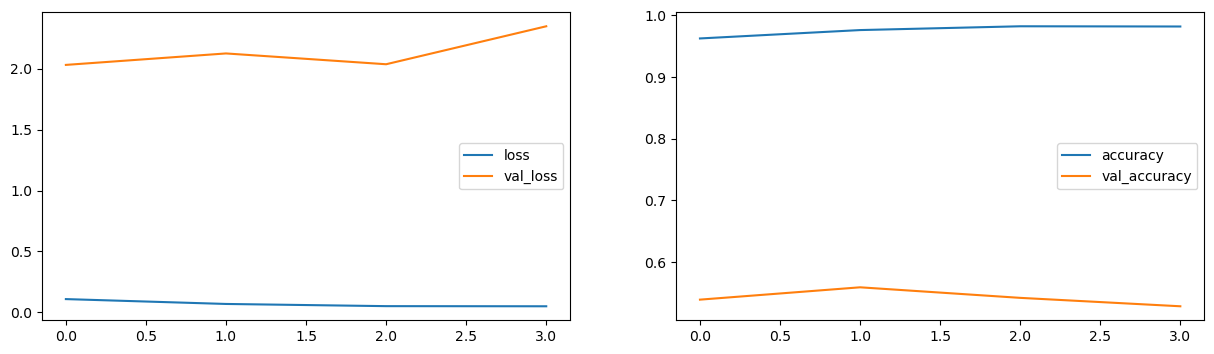

In [79]:
# plot_learning(history)